### 1. Implementação do Algoritmo KNN

**a) Implementação do KNN do zero**

In [ ]:
import numpy as np
from collections import Counter

# Função para calcular a distância euclidiana entre dois pontos
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Implementação da classe KNN (K-Nearest Neighbors)
class KNN:
    def __init__(self, k=3):
        # Construtor da classe. k: número de vizinhos a considerar (padrão é 3)
        self.k = k

    def fit(self, X_train, y_train):
        # Método para "treinar" o modelo
        # Na verdade, o KNN não treina, apenas memoriza os dados
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        # Método para fazer previsões em um conjunto de dados de teste
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Método interno para prever a classe de uma única amostra
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Obtém os índices dos k vizinhos mais próximos
        k_indices = np.argsort(distances)[:self.k]
        # Obtém os rótulos dos k vizinhos mais próximos
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Conta a frequência de cada rótulo
        most_common = Counter(k_nearest_labels).most_common(1)
        # Retorna o rótulo mais comum (a previsão)
        return most_common[0][0]

*Testando KNN do zero*

Acurácia: 0.98


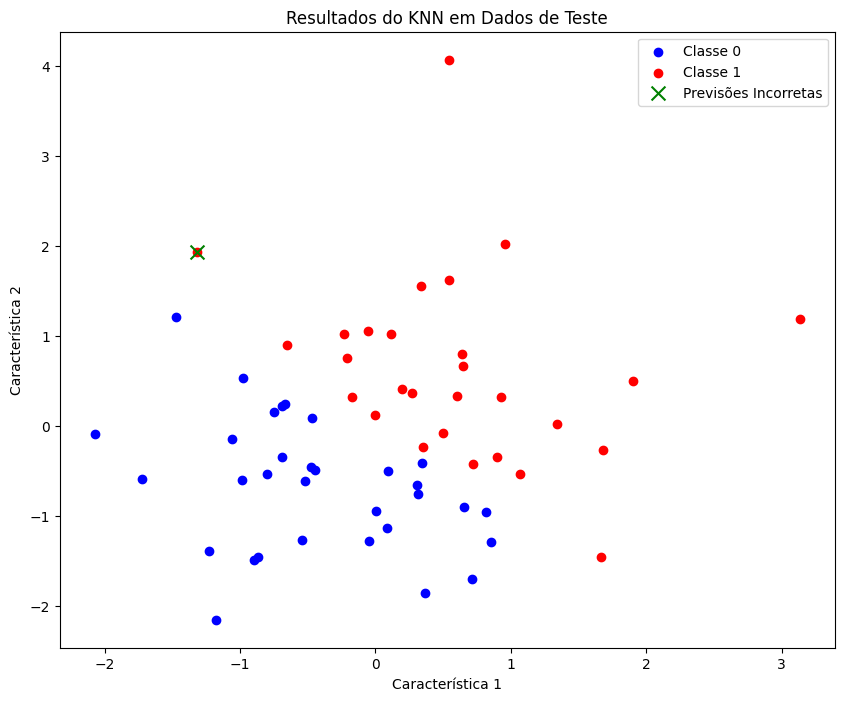

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Importando a classe KNN que você definiu
#from knn import KNN  # Assuma que o código KNN está em um arquivo chamado knn.py

# Gerando dados sintéticos
np.random.seed(42)
X = np.random.randn(300, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criando e treinando o modelo KNN
knn = KNN(k=5)
knn.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred = knn.predict(X_test_scaled)

# Calculando a acurácia
accuracy = np.mean(y_pred == y_test)
print(f"Acurácia: {accuracy:.2f}")

# Visualizando os resultados
plt.figure(figsize=(10, 8))
plt.scatter(X_test_scaled[y_test == 0][:, 0], X_test_scaled[y_test == 0][:, 1], c='blue', label='Classe 0')
plt.scatter(X_test_scaled[y_test == 1][:, 0], X_test_scaled[y_test == 1][:, 1], c='red', label='Classe 1')

# Plotando as previsões incorretas
mask = y_pred != y_test
plt.scatter(X_test_scaled[mask][:, 0], X_test_scaled[mask][:, 1], c='green', marker='x', s=100, label='Previsões Incorretas')

plt.title('Resultados do KNN em Dados de Teste')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

**b) Implementação usando scikit-learn**

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Dividir os dados em conjuntos de treino e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=42 )

# Instanciar o modelo KNN com k vizinhos
knn_sklearn = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo
#knn_sklearn.fit(X_train, y_train)

# Fazer previsões
#y_pred = knn_sklearn.predict(X_test)

# Avaliação
#accuracy = accuracy_score(y_test, y_pred)

#print(f'Acurácia: {accuracy}')


### 2. Conjuntos de Dados

**a) Gerando dados sintéticos 2D:**

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Gerar dados sintéticos
X, y = make_classification(
    n_samples=100,  # número de amostras
    n_features=2,   # número total de características
    n_informative=2,  # número de características informativasD
    n_redundant=0,    # número de características redundantes
    n_repeated=0,     # número de características repetidas
    n_classes=2,      # número de classes
    random_state=42
)

# Plotar os dados
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter)
plt.title('Dados Sintéticos 2D')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

**b) Base de Dados Iris:**

In [ ]:
from sklearn.datasets import load_iris

# Carregar o conjunto de dados Iris
iris = load_iris()
X, y = iris.data, iris.target


**c) Base de Dados Wine:**

In [16]:
from sklearn.datasets import load_wine

# Carregar o conjunto de dados Wine
wine = load_wine()
X, y = wine.data, wine.target


### 3. Pré-processamento

In [17]:
# Importação das bibliotecas necessárias
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def preprocess_data(X, y, test_size=0.3):

    # Dividir os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,  # Proporção do conjunto de teste
        random_state=42       # Semente para reprodutibilidade
    )

    # Criar um objeto StandardScaler para normalização
    scaler = StandardScaler()
    # Ajustar o scaler aos dados de treino e transformá-los
    X_train_scaled = scaler.fit_transform(X_train)
    # Transformar os dados de teste usando o mesmo scaler
    X_test_scaled = scaler.transform(X_test)
    # Retornar os conjuntos de dados processados
    return X_train_scaled, X_test_scaled, y_train, y_test


### 4. Experimentos


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def run_experiments(X, y, k_values=[1, 2, 3, 4, 5, 6, 7, 8, 9], train_percentages=[0.1, 0.2, 0.3, 0.4]):

    results = []

    for train_percentage in train_percentages:
        # Pré-processar os dados para cada porcentagem de treinamento
        X_train, X_test, y_train, y_test = preprocess_data(X, y, test_size=1-train_percentage)

        for k in k_values:
            # Criar e treinar o modelo KNN
            knn = KNeighborsClassifier(n_neighbors=k)  # Substituir por knn_sklearn para usar scikit-learn
            knn.fit(X_train, y_train)

            # Fazer previsões
            y_pred = knn.predict(X_test)

            # Calcular métricas de avaliação
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')
            cm = confusion_matrix(y_test, y_pred)

            # Armazenar resultados
            results.append({
                'k': k,
                'train_percentage': train_percentage,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'confusion_matrix': cm
            })

    return results

In [ ]:
print(results)

### 5. Métricas de Avaliação

As métricas já são calculadas no exemplo acima. As mais importantes são:

- **Acurácia**: Proporção de previsões corretas.
- **Precisão**: Proporção de positivos preditos corretamente.
- **Recall**: Proporção de verdadeiros positivos detectados.
- **F1-Score**: Harmonia entre precisão e recall.
- **Matriz de Confusão**: Detalha a quantidade de previsões corretas e incorretas por classe.

### 6. Análise e Visualização

In [19]:
results = run_experiments(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


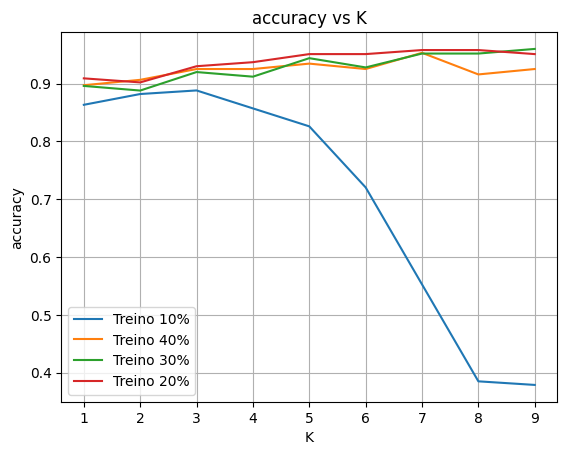

In [20]:
import matplotlib.pyplot as plt


def plot_results(results, metric='accuracy'):
    for train_percentage in set(r['train_percentage'] for r in results):
        k_values = [r['k'] for r in results if r['train_percentage'] == train_percentage]
        metrics = [r[metric] for r in results if r['train_percentage'] == train_percentage]

        plt.plot(k_values, metrics, label=f'Treino {train_percentage*100:.0f}%')

    plt.xlabel('K')
    plt.ylabel(metric)
    plt.title(f'{metric} vs K')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotar a acurácia para diferentes valores de k e porcentagens de treino
plot_results(results)

In [21]:
# Função para gerar uma tabela com os resultados
def generate_table(results, metric='f1'):
    """
    Gera uma tabela (DataFrame) onde o eixo X é K e o eixo Y é o percentual de treino.
    As células contêm o valor da métrica escolhida.

    Args:
        results (list): Lista de dicionários com os resultados dos experimentos.
        metric (str): A métrica a ser exibida na tabela ('accuracy', 'precision', 'recall', 'f1').

    Returns:
        pd.DataFrame: Tabela com a métrica para cada valor de K e percentual de treino.
    """
    # Extrai as percentagens de treino e valores de K únicos
    train_percentages = sorted(set(r['train_percentage'] for r in results))
    k_values = sorted(set(r['k'] for r in results))

    # Cria um DataFrame vazio com percentuais no índice e K nos colunas
    table = pd.DataFrame(index=[f'{p*100:.0f}%' for p in train_percentages], columns=k_values)

    # Preenche a tabela com os valores da métrica selecionada
    for r in results:
        table.at[f'{r["train_percentage"]*100:.0f}%', r['k']] = r[metric]

    return table


In [22]:
import pandas as pd

# Gerar a tabela para a métrica 'accuracy'
accuracy_table = generate_table(results, metric='accuracy')
print("Tabela de Accuracy:")
print(accuracy_table)

# Gerar a tabela para a métrica 'f1'
f1_table = generate_table(results, metric='f1')
print("\nTabela de F1:")
print(f1_table)

Tabela de Accuracy:
            1         2         3         4         5         6         7  \
10%  0.863354  0.881988  0.888199  0.857143  0.826087  0.720497  0.552795   
20%  0.909091  0.902098   0.93007  0.937063  0.951049  0.951049  0.958042   
30%     0.896     0.888      0.92     0.912     0.944     0.928     0.952   
40%  0.897196  0.906542  0.925234  0.925234  0.934579  0.925234  0.953271   

            8         9  
10%  0.385093  0.378882  
20%  0.958042  0.951049  
30%     0.952      0.96  
40%  0.915888  0.925234  

Tabela de F1:
            1         2         3         4         5         6         7  \
10%   0.86452  0.883609  0.889194  0.858246   0.82616  0.712497  0.490687   
20%  0.907692  0.901926  0.929773  0.936668  0.951114  0.951114  0.957839   
30%   0.89367  0.886143  0.918173  0.910152  0.943142  0.926753  0.951414   
40%  0.893729  0.906337  0.923878  0.925138   0.93392   0.92438  0.953346   

            8         9  
10%  0.221303  0.208214  
20%  0.9578

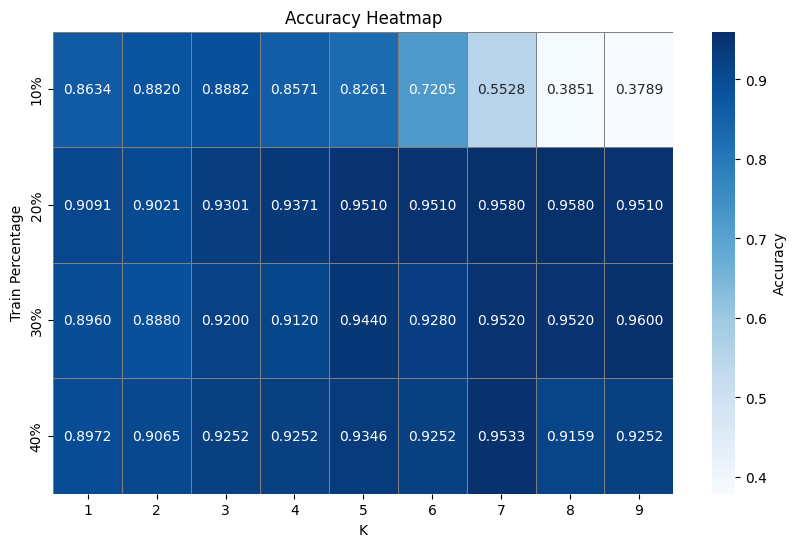

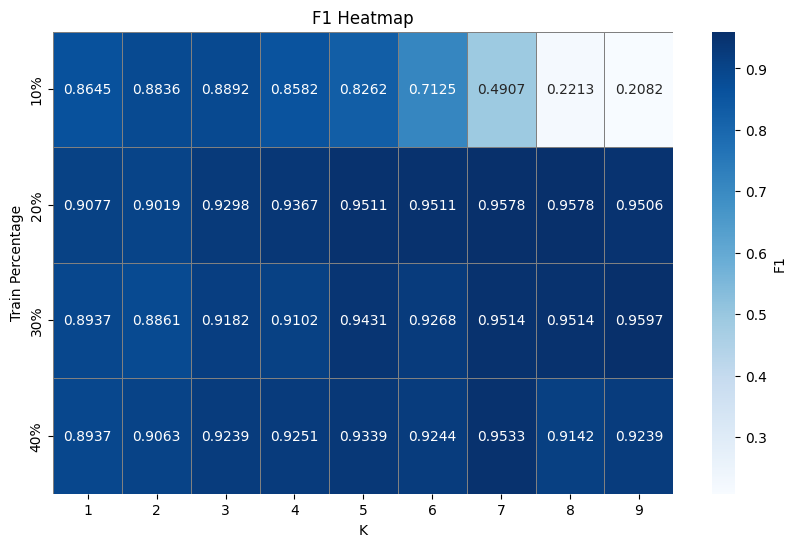

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Função para gerar e exibir a tabela de forma gráfica com heatmap
def plot_table_heatmap(table, metric_name):
    """
    Plota um heatmap de uma tabela usando seaborn, para visualização de métricas.

    Args:
        table (pd.DataFrame): DataFrame com os resultados da métrica.
        metric_name (str): Nome da métrica para o título do gráfico.
    """
    # Converter para float e substituir NaN por 0 (ou outro valor adequado)
    table = table.apply(pd.to_numeric, errors='coerce').fillna(0)

    plt.figure(figsize=(10, 6))
    sns.heatmap(table, annot=True, cmap="Blues", fmt=".4f", linewidths=0.5, linecolor='gray',
                cbar_kws={'label': metric_name.capitalize()})
    plt.title(f'{metric_name.capitalize()} Heatmap')
    plt.xlabel('K')
    plt.ylabel('Train Percentage')
    plt.show()

# Gerar a tabela para a métrica 'accuracy'
accuracy_table = generate_table(results, metric='accuracy')
plot_table_heatmap(accuracy_table, 'accuracy')

# Gerar a tabela para a métrica 'f1'
f1_table = generate_table(results, metric='f1')
plot_table_heatmap(f1_table, 'f1')



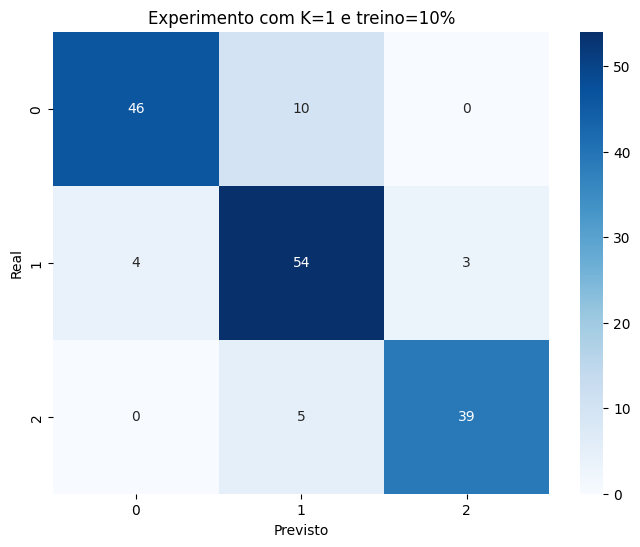

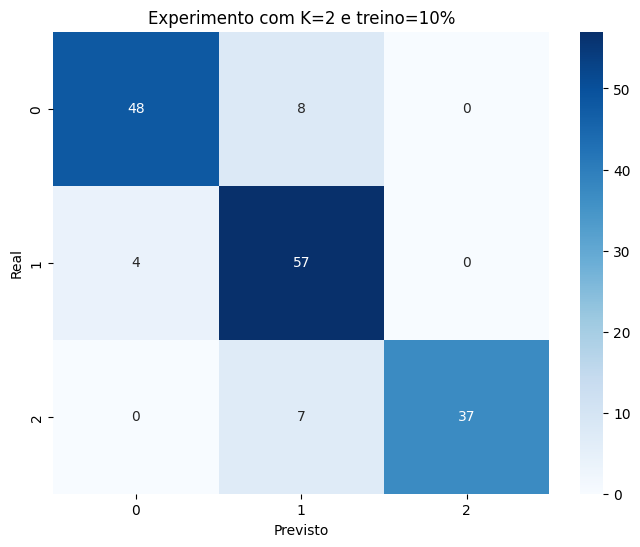

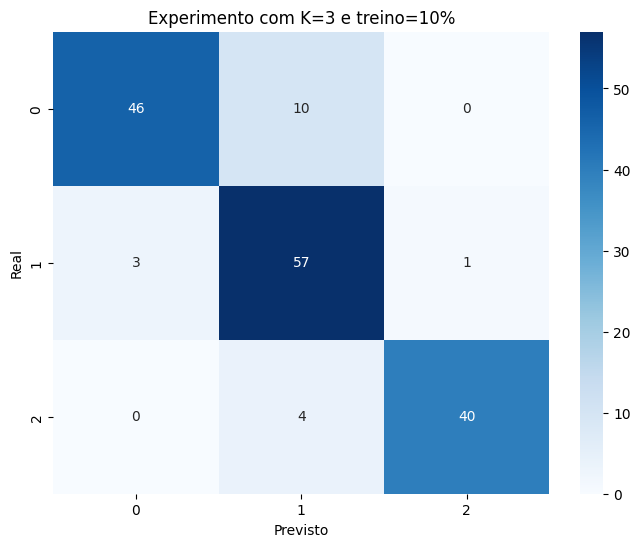

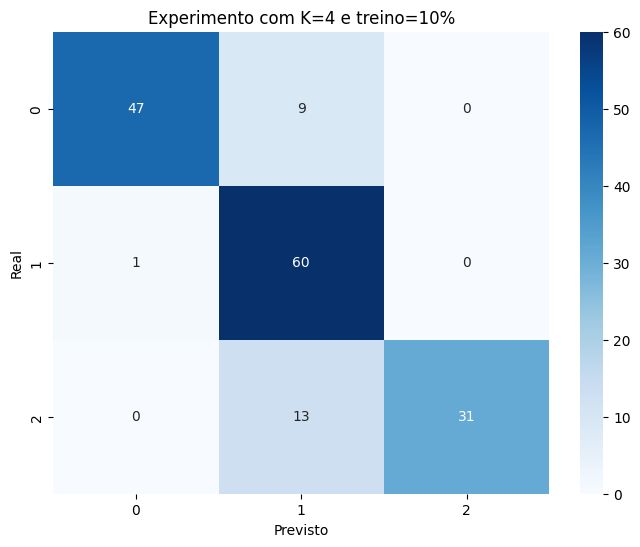

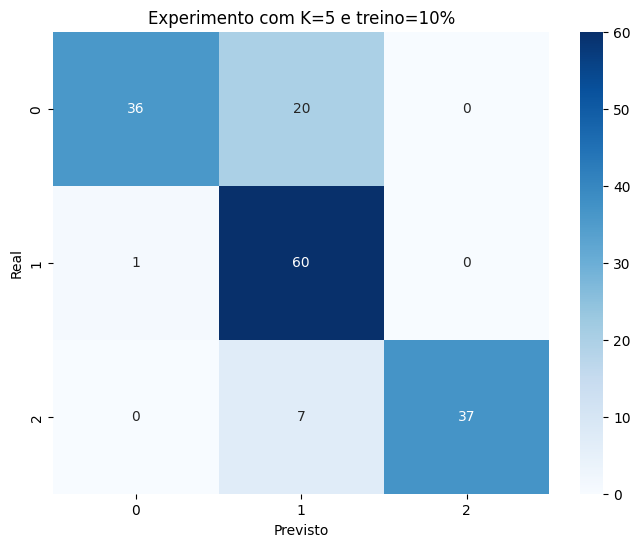

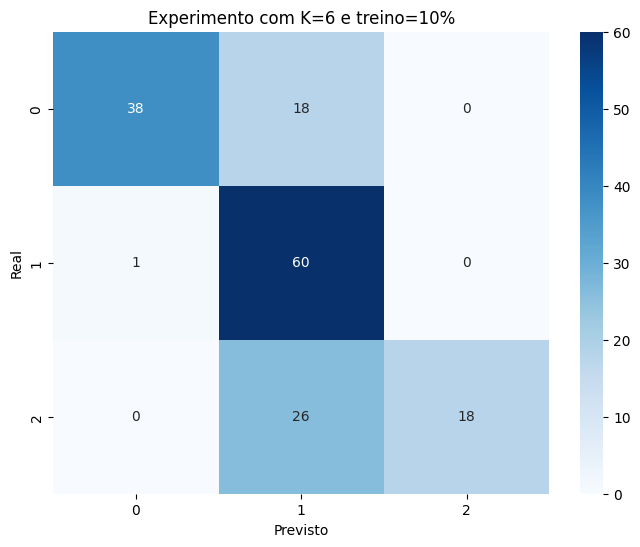

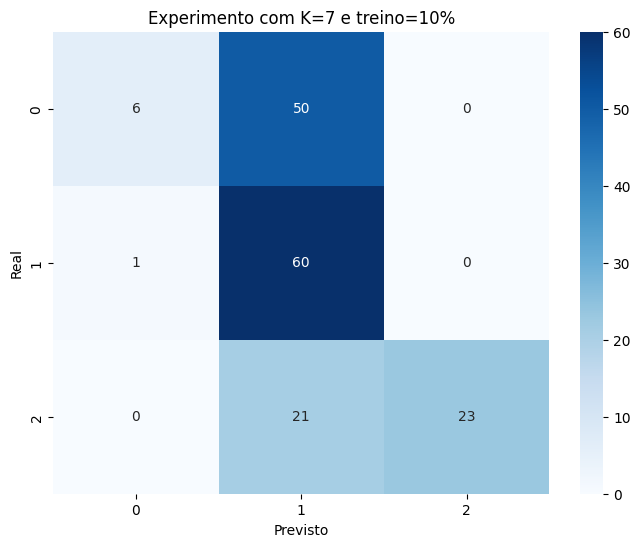

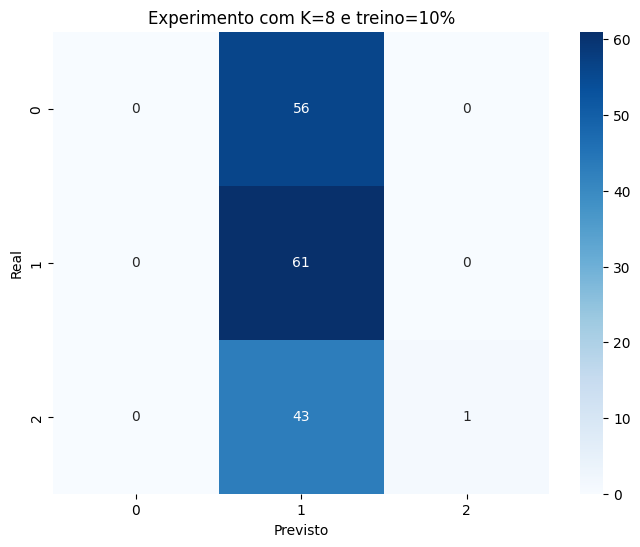

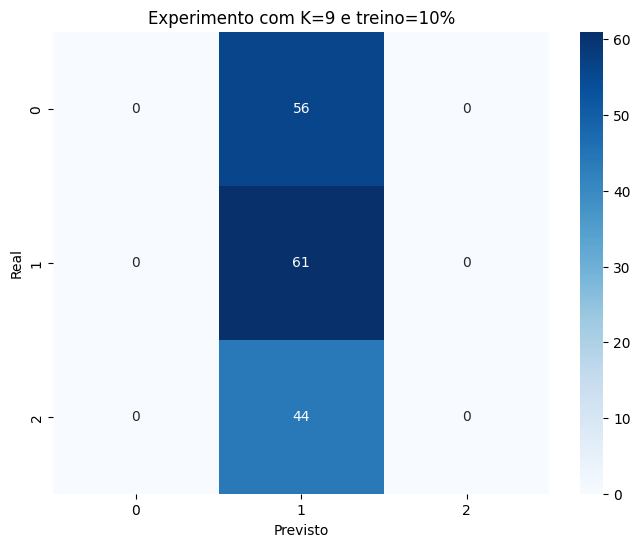

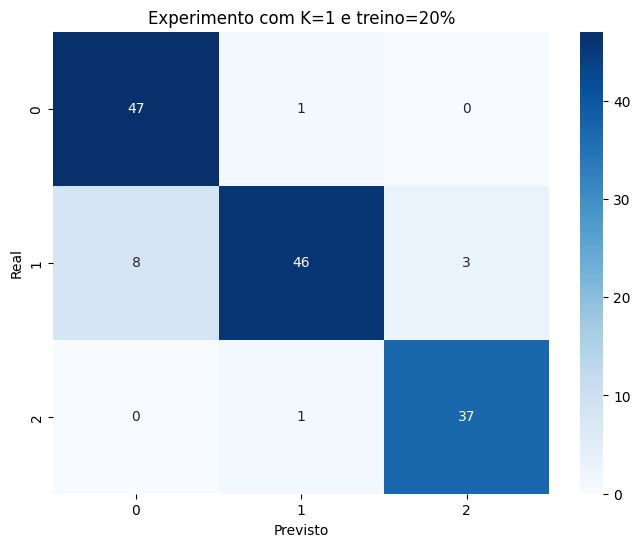

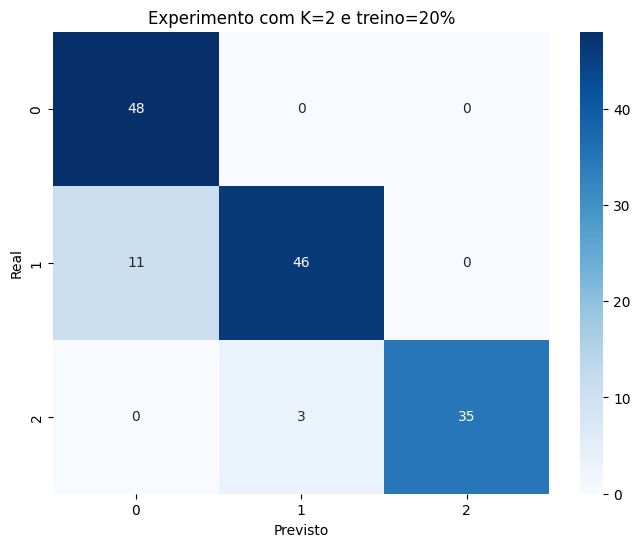

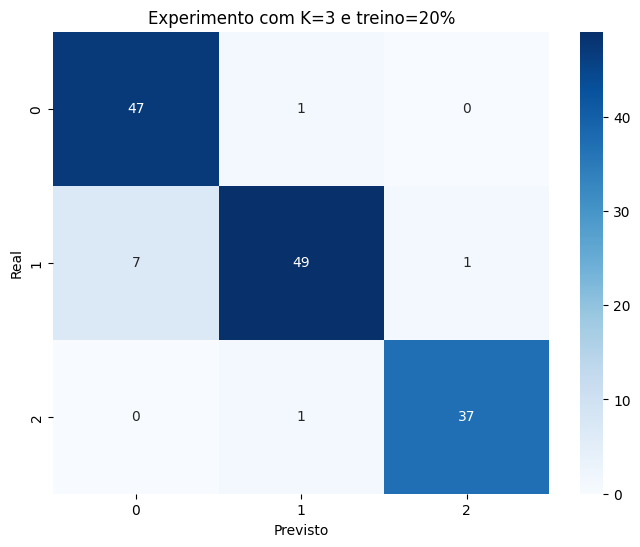

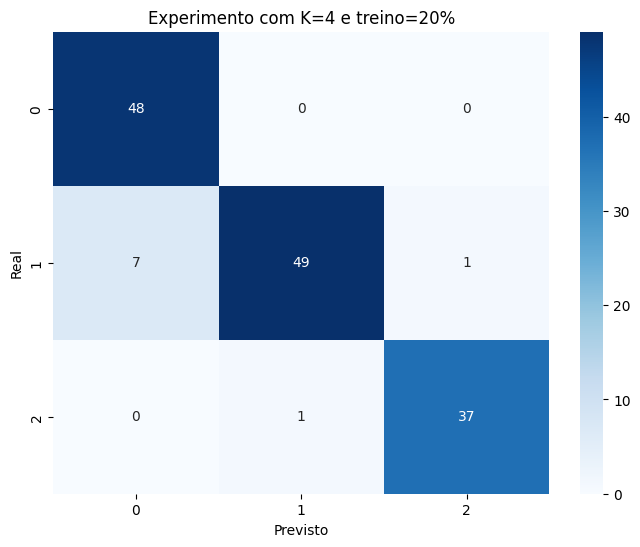

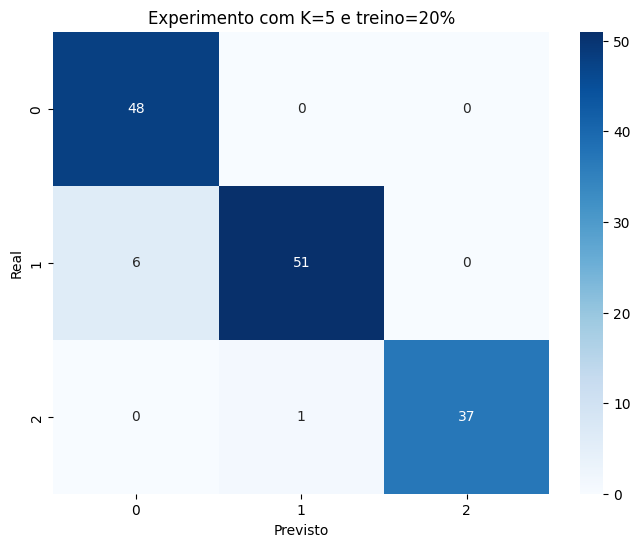

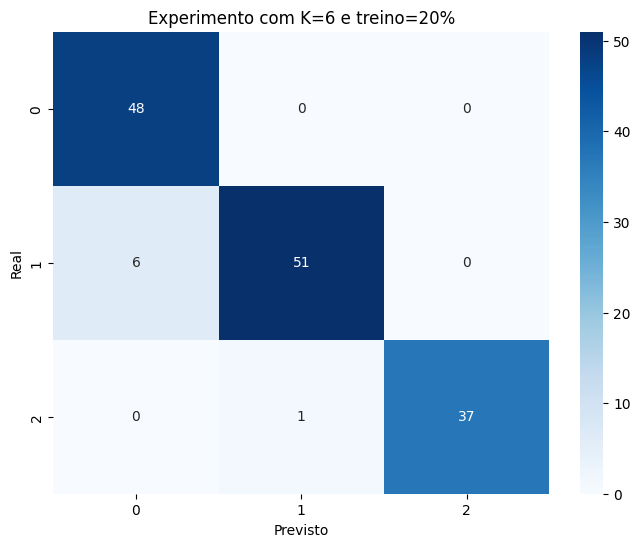

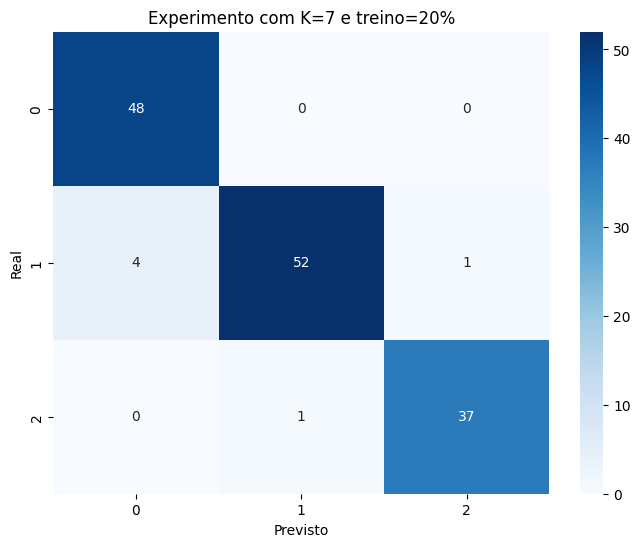

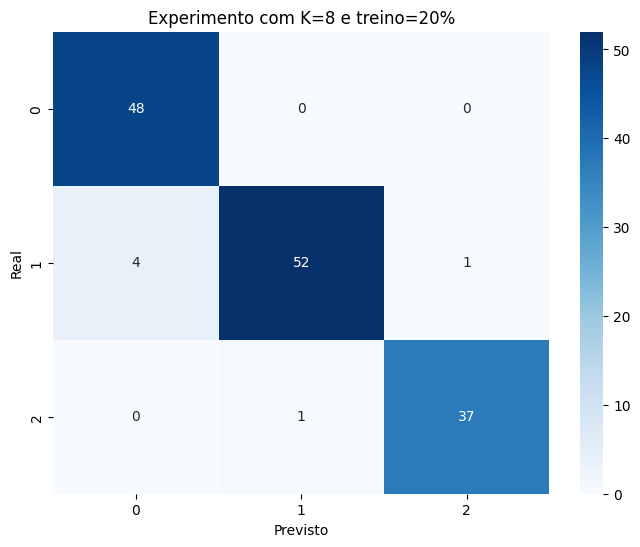

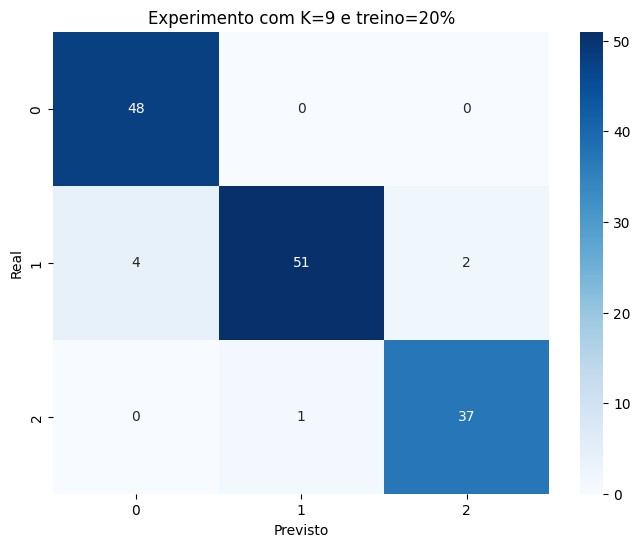

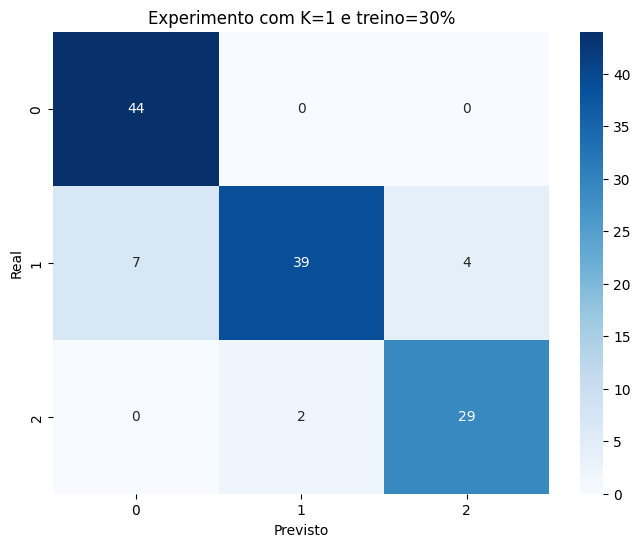

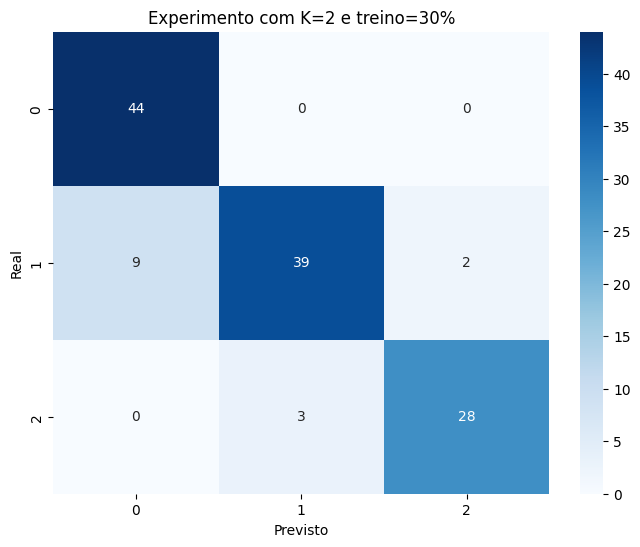

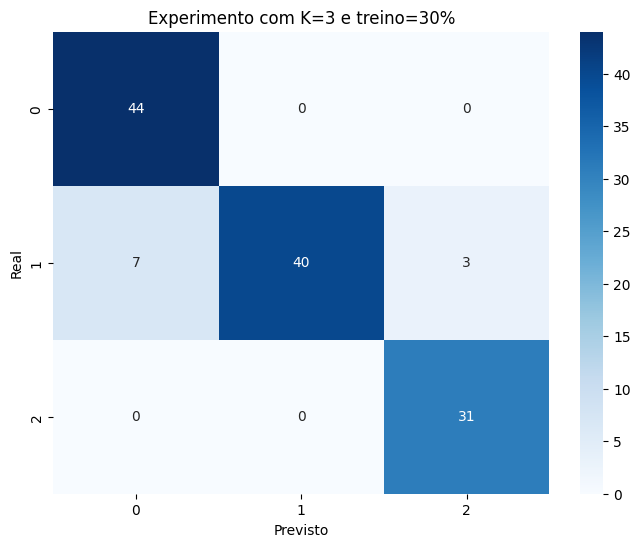

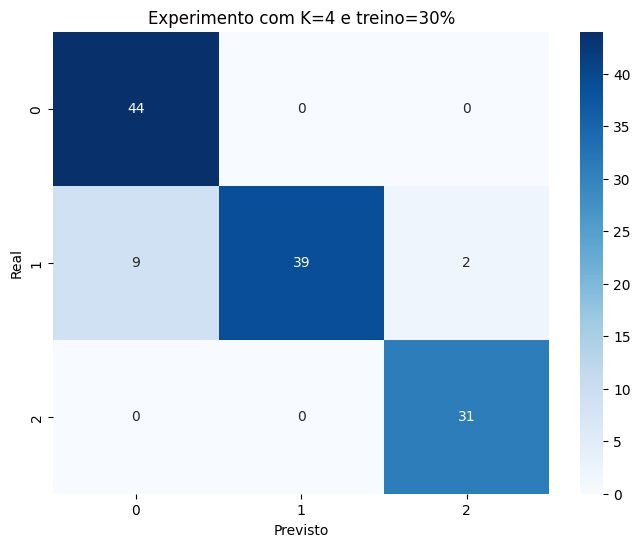

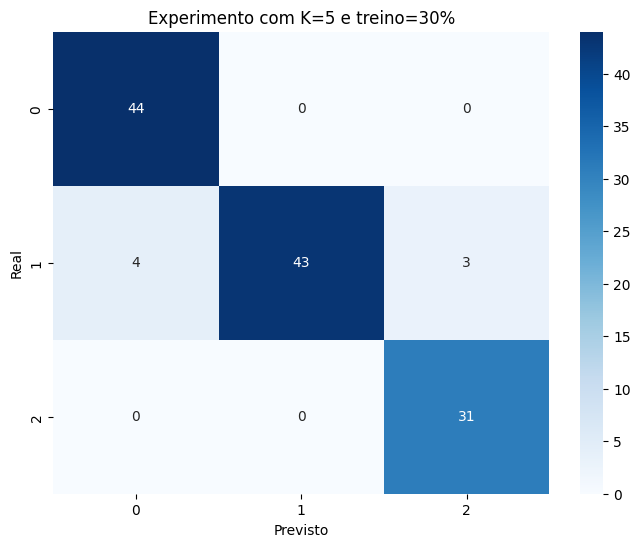

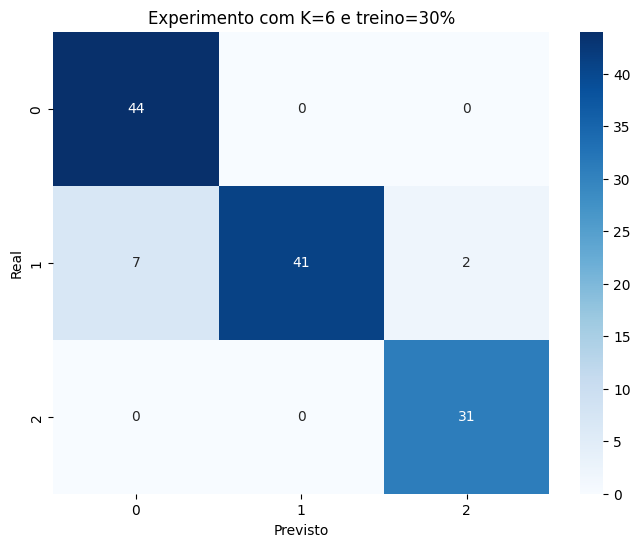

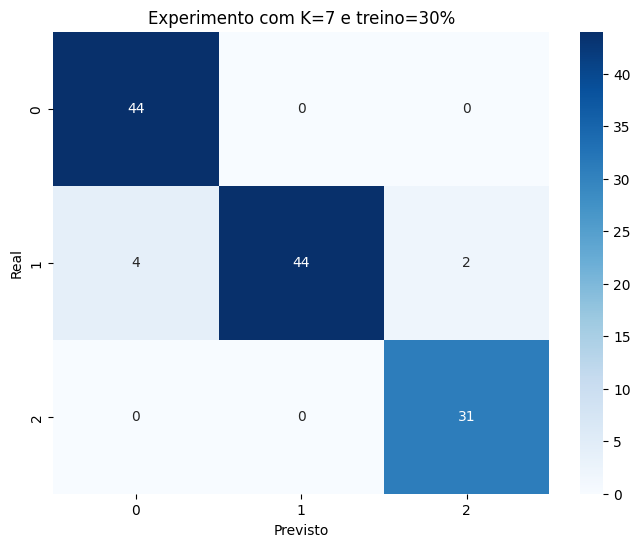

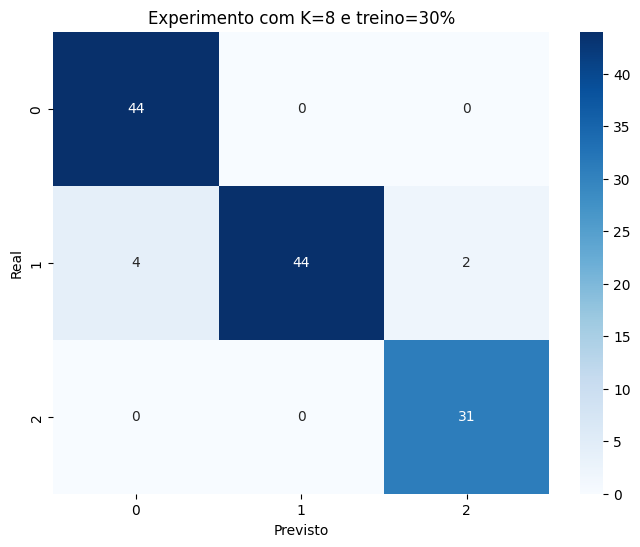

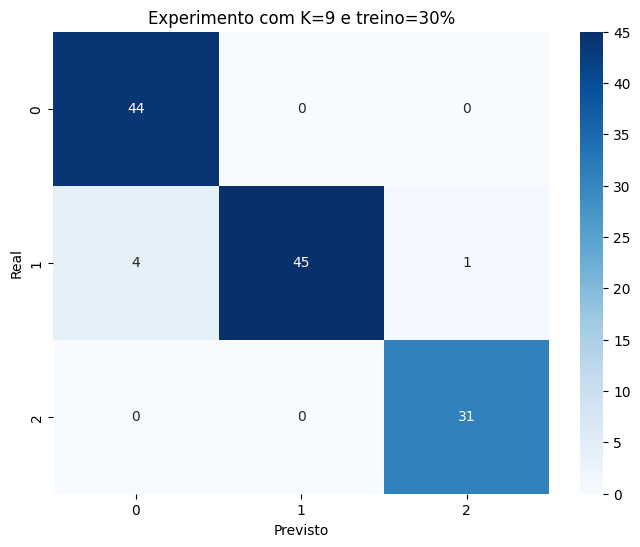

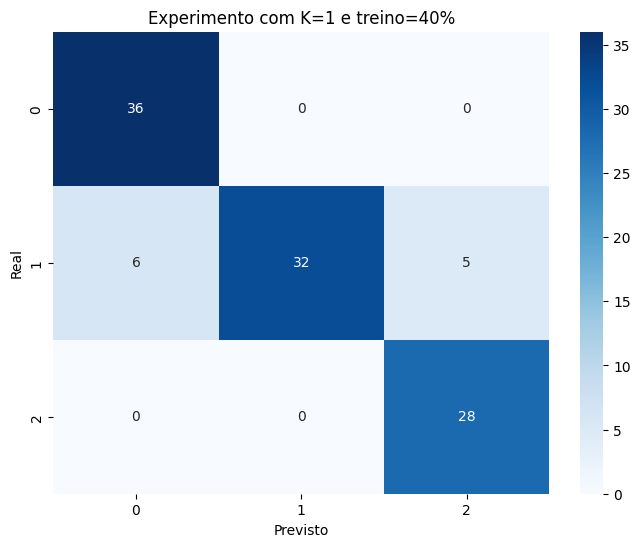

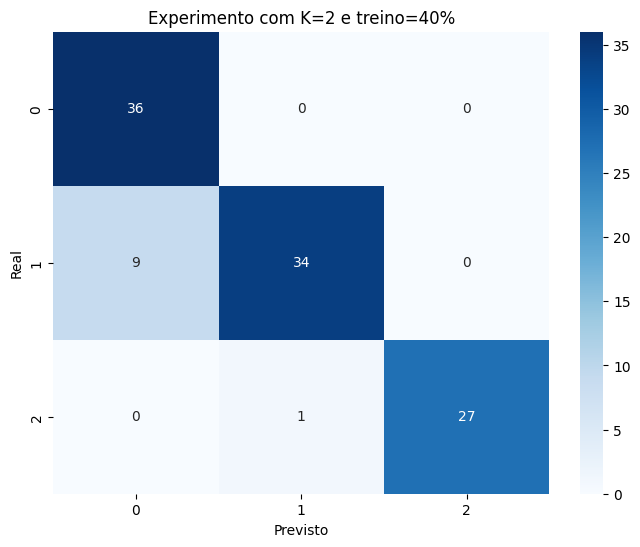

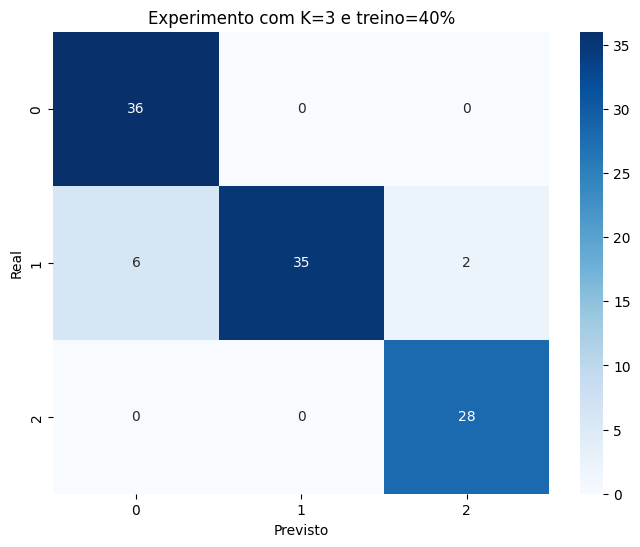

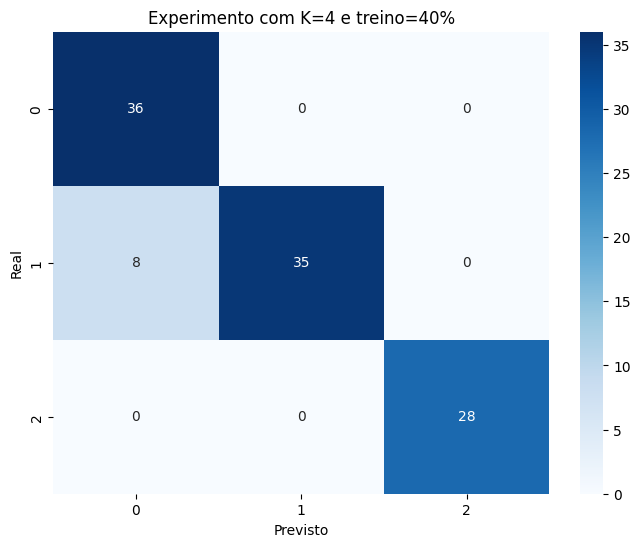

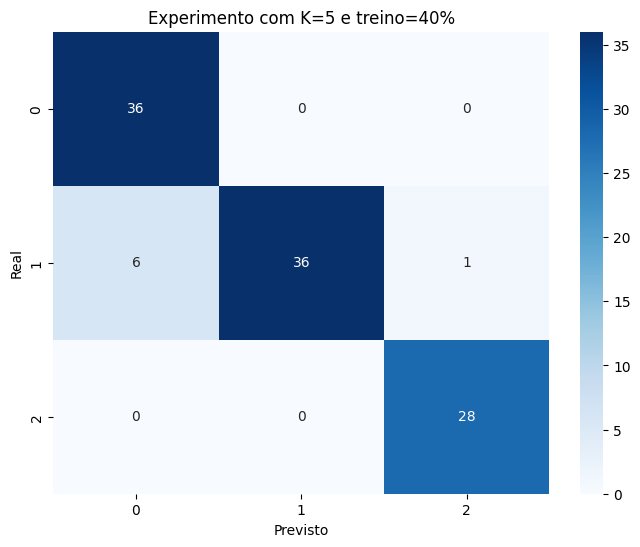

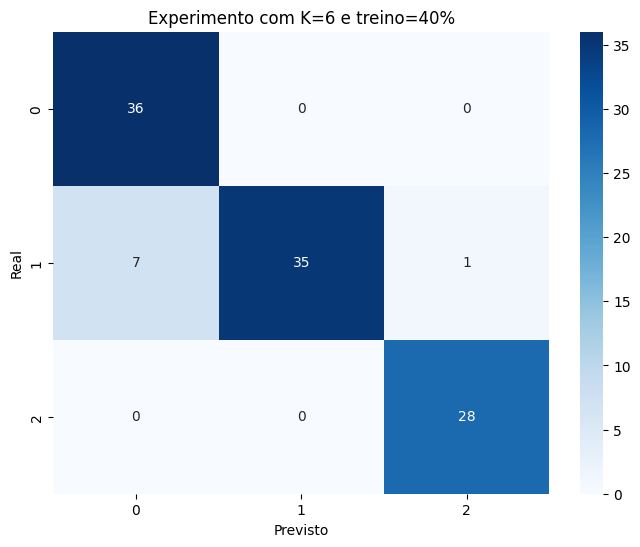

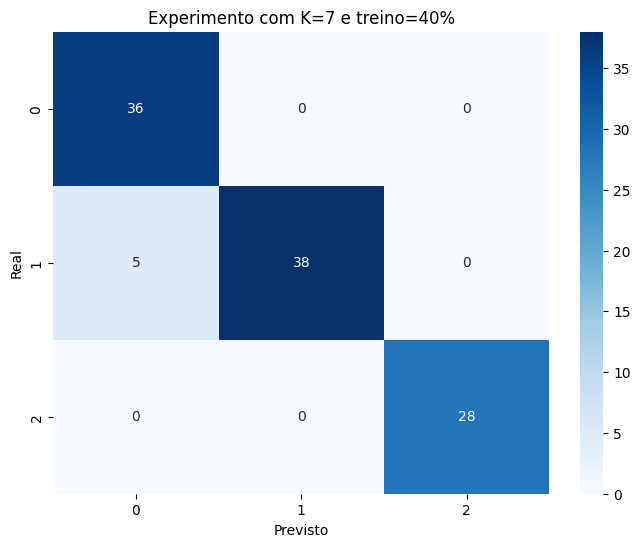

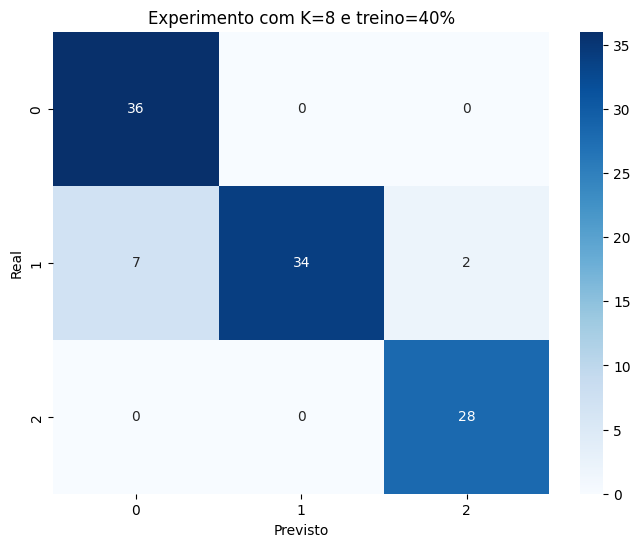

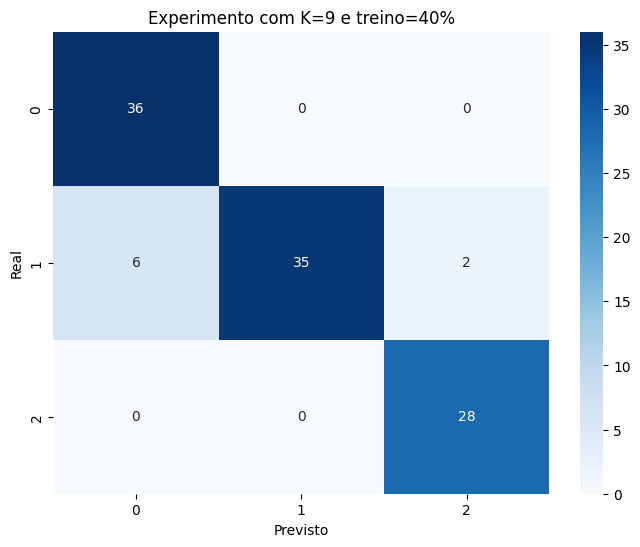

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrices_with_params(results):
    for i, result in enumerate(results):
        plt.figure(figsize=(8, 6))
        sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
        plt.title(f'Experimento com K={result["k"]} e treino={result["train_percentage"]*100:.0f}%')
        plt.xlabel('Previsto')
        plt.ylabel('Real')
        plt.show()

# Plotar as matrizes de confusão com os parâmetros
plot_confusion_matrices_with_params(results)